In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-03-BIGDATA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


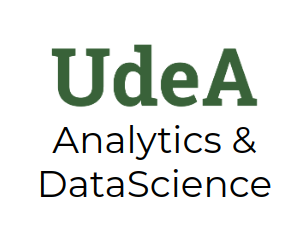

In [2]:
Image("local/imgs/udea-datascience.png")

# **TALLER 3: DATAFRAME**
## Desarrollado por: Mg. Efraín Alberto Oviedo
## Universidad de Antioquia

Por favor, ingrese la siguiente información:

**Nombre Completo:July Andrea Muñoz Lopera**

**Cédula: 1020393965**

**Correo Institucional: july.munoz@udea.edu.co**

**Nombre Completo:Oscar Felipe Robayo Lozano**

**Cédula: 1234191132**

**Correo Institucional:oscar.robayo1303@gmail.com**

**Nombre Completo: Daniel Alberto Lopez Sanchez**

**Cédula: 1036668134**

**Correo Institucional: daniel.lopez6@udea.edu.co**


#**Pacientes sometidos a cirugías por tumores malignos**

Se dispone de un conjunto de datos (pacientes.json) que contiene datos socio demográficos de pacientes que fueron sometidos a procedimientos quirúrgicos durante los años 2007 a 2018 y cuyos Códigos Internacionales de Enfermedades (CIE-10) correspondía a tumores malignos. Tomado de: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Perfil-socio-demogr-fico-pacientes-sometidos-a-cir/i45c-f4fs


Por cada paciente, se dispone de los siguientes atributos:
 
* DiagnosticoAgrupado: Nombre del Grupo de Diagnóstico Agrupado
* Cirugia: Descripción del Procedimiento Quirúrgico
* TipoAtencion: Tipo de atención que generó el procedimiento (Urgencia-Programada)
* Edad: Edad en años del paciente
* Subregion: Subregión del departamento de la cual proviene el paciente
* Regimen: Régimen de salud al cual pertenecía el paciente al momento del procedimiento
* Genero: Genero del paciente
* Estado_Civil: Estado civil del paciente al momento del procedimiento quirúrgico
* Etnia: Etnia a la cual pertenecía el paciente al momento del procedimiento quirúrgico
* Estrato: Nivel socio económico del paciente al momento del procedimiento quirúrgico
* Año en el cual fue realizado el procedimiento quirúrgico

Se requiere de su apoyo para comprender el comportamiento de esta enfermedad, respondiendo las siguientes inquietudes:



In [3]:
#Instalación
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz 
!pip install -q findspark

#Variables de Entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

#SparkContext
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

from pyspark.sql.types import *

In [4]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)

In [5]:
pacientes = sqlCtx.read.option("header",True) \
     .json("local/data/pacientes.json")
pacientes.show(20)

+----+--------------------+--------------------+----+------------+---------+--------+------+------------+--------------+------------+
| Año|             Cirugia| DiagnosticoAgrupado|Edad|Estado_Civil|  Estrato|   Etnia|Genero|     Regimen|     Subregion|TipoAtencion|
+----+--------------------+--------------------+----+------------+---------+--------+------+------------+--------------+------------+
|2007|   TRAQUEOSTOMIA SOD|CARCINOMA IN SITU...|  77|      Casado|Estrato 4|Indigena|     M|  PARTICULAR|    Centro Sur|    Urgencia|
|2007|   TRAQUEOSTOMIA SOD|CARCINOMA IN SITU...|  77|      Casado|Estrato 4|Indigena|     M|  PARTICULAR|    Centro Sur|    Urgencia|
|2007|MICROENDOSCOPIA L...|CARCINOMA IN SITU...|  77|      Casado|Estrato 4|Indigena|     M|  PARTICULAR|    Centro Sur|    Urgencia|
|2007|MICROENDOSCOPIA L...|CARCINOMA IN SITU...|  77|      Casado|Estrato 4| Ninguna|     M|  PARTICULAR|    Centro Sur|    Urgencia|
|2007|HEMICOLECTOMIA DE...|TUMOR MALIGNO DEL...|  66|      Cas

##**A) Calidad de datos**

Revise cada una de las variables disponibles y solucione los posibles problemas presentes respecto a registros nulos y atípicos.

Analice el tipo de dato utilizado para cada variable y realice los ajustes que considere necesarios para optimizar el almacenamiento

Justificando las decisiones tomadas en cada caso 

Presente aquí el código desarrollado y el resultado obtenido

In [6]:
pacientes.printSchema()

root
 |-- Año: long (nullable = true)
 |-- Cirugia: string (nullable = true)
 |-- DiagnosticoAgrupado: string (nullable = true)
 |-- Edad: long (nullable = true)
 |-- Estado_Civil: string (nullable = true)
 |-- Estrato: string (nullable = true)
 |-- Etnia: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Regimen: string (nullable = true)
 |-- Subregion: string (nullable = true)
 |-- TipoAtencion: string (nullable = true)



Podemos visualizar los tipos de datos asumidos para cada variable de la base. Identificamos que los tipos string están correctamente tipificados. Pero por ejemplo Año y Edad, que son los datos númericos, podemos optimizarlos cambiando el tipo de dato.

In [7]:
schema = StructType() \
      .add("Año",IntegerType(),True) \
      .add("Cirugia",StringType(),True) \
      .add("DiagnosticoAgrupado",StringType(),True) \
      .add("Edad",ByteType(),True) \
      .add("Estado_Civil",StringType(),True) \
      .add("Estrato",StringType(),True) \
      .add("Etnia",StringType(),True) \
      .add("Genero",StringType(),True) \
      .add("Regimen",StringType(),True) \
      .add("Subregion",StringType(),True) \
      .add("TipoAtencion",StringType(),True)

In [8]:
pacientes_df = sqlCtx.read.format("json") \
      .option("header", True) \
      .option("delimiter", ",") \
      .schema(schema) \
      .load("local/data/pacientes.json")

In [9]:
pacientes_df.printSchema()
pacientes_df.show()

root
 |-- Año: integer (nullable = true)
 |-- Cirugia: string (nullable = true)
 |-- DiagnosticoAgrupado: string (nullable = true)
 |-- Edad: byte (nullable = true)
 |-- Estado_Civil: string (nullable = true)
 |-- Estrato: string (nullable = true)
 |-- Etnia: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Regimen: string (nullable = true)
 |-- Subregion: string (nullable = true)
 |-- TipoAtencion: string (nullable = true)

+----+--------------------+--------------------+----+------------+---------+--------+------+------------+--------------+------------+
| Año|             Cirugia| DiagnosticoAgrupado|Edad|Estado_Civil|  Estrato|   Etnia|Genero|     Regimen|     Subregion|TipoAtencion|
+----+--------------------+--------------------+----+------------+---------+--------+------+------------+--------------+------------+
|2007|   TRAQUEOSTOMIA SOD|CARCINOMA IN SITU...|  77|      Casado|Estrato 4|Indigena|     M|  PARTICULAR|    Centro Sur|    Urgencia|
|2007|   TRAQUEO

In [26]:
from pyspark.sql.functions import col 

columns = pacientes_df.columns

for column in columns:
  total_distinct_values = pacientes_df.select(column).distinct().count()
  total_null_values = pacientes_df.filter(col(column).isNull()).count()
  print("""
Column {} has {} distinct values with {} null values
  """.format(column, total_distinct_values, total_null_values))
  if total_distinct_values < 30:
    pacientes_df.select(column).groupBy(column).count().show(30, False)


Column Año has 13 distinct values with 125 null values
  
+----+-----+
|Año |count|
+----+-----+
|2007|1103 |
|2018|1220 |
|2015|1492 |
|2013|1681 |
|null|125  |
|2014|1381 |
|2012|953  |
|2009|1042 |
|2016|1123 |
|2010|970  |
|2011|753  |
|2008|1133 |
|2017|1276 |
+----+-----+


Column Cirugia has 675 distinct values with 0 null values
  

Column DiagnosticoAgrupado has 82 distinct values with 0 null values
  

Column Edad has 83 distinct values with 125 null values
  

Column Estado_Civil has 7 distinct values with 0 null values
  
+------------+-----+
|Estado_Civil|count|
+------------+-----+
|M           |122  |
|Viudo       |914  |
|Casado      |8695 |
|Soltero     |3358 |
|Union Libre |784  |
|P           |254  |
|            |125  |
+------------+-----+


Column Estrato has 8 distinct values with 0 null values
  
+---------+-----+
|Estrato  |count|
+---------+-----+
|Estrato 3|2169 |
|Estrato 2|1983 |
|Estrato 6|17   |
|Estrato 4|226  |
|Estrato 0|5014 |
|Estrato 1|4678 |
|    

Se observa que para la variable anio y edad, hay 125 registros nulos. Sin embargo, se observa que esa misma cantidad se repite en las variables de tipo String, con el caracter vacio. Se analizara, si coincide con las mismas muestras

In [42]:
from pyspark.sql.functions import *

total_null_all_columns = pacientes_df.filter(    
  (col("Año").isNull()) &
  (trim(col("Cirugia"))=="") &
  (trim(col("DiagnosticoAgrupado"))=="") &
  (col("Edad").isNull()) &
  (trim(col("Estado_Civil"))=="") &
  (trim(col("Estrato"))=="") &
  (trim(col("Etnia"))=="") &
  (trim(col("Genero"))=="") &
  (trim(col("Regimen"))=="") &
  (trim(col("Subregion"))=="") &
  (trim(col("TipoAtencion"))=="")
).count()

print("Total number of null and empty values in all columns is: {}".format(total_null_all_columns))

Total number of null and empty values in all columns is: 0


Se observa que no existen registros nulos o vacios en conjunto. Se explora a continuacion en una de las columnas, como se presenta la informacion de los registros nulos

In [43]:
pacientes_df.filter(col("Año").isNull()).show(125, False)

+----+------------------------------------------------------------------------------+----------------------------------------------------------------------------+----+------------+-------+-----+------+-------+---------+------------+
|Año |Cirugia                                                                       |DiagnosticoAgrupado                                                         |Edad|Estado_Civil|Estrato|Etnia|Genero|Regimen|Subregion|TipoAtencion|
+----+------------------------------------------------------------------------------+----------------------------------------------------------------------------+----+------------+-------+-----+------+-------+---------+------------+
|null|IMPLANTACION DE CATETER VENOSO SUBCLAVIO O FEMORAL APLICA PARA CATETER YUGULAR|TUMOR MALIGNO DE LA MAMA                                                    |null|            |       |     |      |       |         |            |
|null|IMPLANTACION DE CATETER VENOSO SUBCLAVIO O FEMORAL APLICA PARA

Se observa, que todas las columnas menos Cirugia y Diagnostico Agrupado tienen informacion nula o vacia. Dado esto, y que no se tiene informacion en mas del 50% del total de las variables, se decide eliminar estos datos

In [45]:
df_transform = pacientes_df.na.drop(subset=["Año"])
print("Despues de quitar los nulos, se tienen {} registros nulos".format(df_transform.filter(col("Año").isNull()).count()))

Despues de quitar los nulos, se tienen 0 registros nulos


##**B) Análisis por rango de edad**

Identifique las 5 cirugías mas frecuentes para los mayores de 80 años y para los menores de 20 años, indicando la influencia del género para cada grupo de edad 

In [97]:
from pyspark.sql.window import Window
from pyspark.sql.functions import count

windowSpecCirugia  = Window.partitionBy("Cirugia")
windowSpecCirugiaGenero  = Window.partitionBy("Cirugia", "Genero")

df_group_age_80 = df_transform \
                .filter(col("Edad")>80) \
                .withColumn("total_cirugia",count(col("Cirugia")).over(windowSpecCirugia)) \
                .withColumn("total_genero",count(col("Genero")).over(windowSpecCirugiaGenero))

list_top_5_counts = df_group_age_80.select("total_cirugia").orderBy(col("total_cirugia").desc()).distinct().limit(5).rdd.map(lambda x: x[0]).collect()
df_group_age_80_top_5 = df_group_age_80.filter(col("total_cirugia").isin(list_top_5_counts)) \
                        .select(col("Cirugia"), col("Genero"), col("total_cirugia"), col("total_genero")) \
                        .distinct()
df_group_age_80_top_5_total = df_group_age_80_top_5.select("Cirugia", "total_cirugia").distinct().orderBy(col("total_cirugia").desc() )
df_group_age_80_top_5_total.show()

df_group_age_80_top_5_total_sex = df_group_age_80_top_5.select("Cirugia", "Genero", "total_genero").distinct().orderBy(col("Cirugia").desc() )
df_group_age_80_top_5_total_sex.show(100)

+--------------------+-------------+
|             Cirugia|total_cirugia|
+--------------------+-------------+
|   TRAQUEOSTOMIA SOD|           26|
|CISTOSCOPIA TRANS...|           22|
|TIROIDECTOMIA TOT...|           19|
|RESECCION DE TUMO...|            7|
|RESECCCION  O ENU...|            6|
|HEMICOLECTOMIA DE...|            6|
|RECONSTRUCCION DE...|            6|
|COLECTOMIA PARCIA...|            6|
|RESECCION ENDOSCO...|            6|
|OMENTECTOMIA PARCIAL|            6|
|GASTROENTEROANAST...|            6|
|RESECCION INTESTI...|            6|
|EXTERIORIZACION D...|            6|
|RESECCION TUMOR M...|            6|
|LEGRADO UTERINO G...|            6|
+--------------------+-------------+

+--------------------+------+------------+
|             Cirugia|Genero|total_genero|
+--------------------+------+------------+
|   TRAQUEOSTOMIA SOD|     F|          11|
|   TRAQUEOSTOMIA SOD|     M|          15|
|TIROIDECTOMIA TOT...|     F|          16|
|TIROIDECTOMIA TOT...|     M|         

Se observa en la tabla anterior el total de cirugias que se han hecho para una determinada cirugia en personas mayores a 80 anios, con la cantidad de generos F y M por cirugia. Es curioso, ver que claramente existe un top 4 (TRAQUEOSTOMIA SOD, CISTOSCOPIA TRANS, TIROIDECTOMIA TOT, RESECCION DE TUMO). Sin embargo, para la 5ta mas popular, existen varias mas que se repiten con la misma frecuencia, por lo que no es claro definir cual es la mas popular. Se observa una diferencia considerable en el sexo para CISTOSCOPIA TRANS, con un desbalance de 16 a 6 para hombres y mujeres. Lo mismo sucede con TIROIDECTOMIA TOT presentandose el mayor numero de cirugias para mujeres. Para las demas, el comportamiento parece ser similar

In [102]:
df_group_age_20 = df_transform \
                .filter(col("Edad")<20) \
                .withColumn("total_cirugia",count(col("Cirugia")).over(windowSpecCirugia)) \
                .withColumn("total_genero",count(col("Genero")).over(windowSpecCirugiaGenero))

list_top_5_counts = df_group_age_20.select("total_cirugia").orderBy(col("total_cirugia").desc()).distinct().limit(5).rdd.map(lambda x: x[0]).collect()
df_group_age_20_top_5 = df_group_age_20.filter(col("total_cirugia").isin(list_top_5_counts)) \
                        .select(col("Cirugia"), col("Genero"), col("total_cirugia"), col("total_genero")) \
                        .distinct()
df_group_age_20_top_5_total = df_group_age_20_top_5.select("Cirugia", "total_cirugia").distinct().orderBy(col("total_cirugia").desc() )
df_group_age_20_top_5_total.show(100, False)

df_group_age_20_top_5_total_sex = df_group_age_20_top_5.select("Cirugia", "Genero", "total_genero").distinct().orderBy(col("Cirugia").desc() )
df_group_age_20_top_5_total_sex.show(100, False)

+------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|Cirugia                                                                                                                                   |total_cirugia|
+------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|RESECCION DE TUMOR DE LINEA MEDIA SUPRATENTORIAL POR CRANEOTOMIA                                                                          |9            |
|LOBECTOMIA POR CRANEOTOMIA SOD                                                                                                            |9            |
|PLASTIA O INJERTO DE MENINGE ESPINAL                                                                                                      |7            |
|RESECCION DE TUMOR DE LA BASE DEL CRANEO FOSA POSTERIOR POR VIA SUBOC

Se observa en la tabla anterior el total de cirugias que se han hecho para una determinada cirugia en personas menores de 20 anios, con la cantidad de generos F y M por cirugia. 
Se evicencia el top 5 (en contraste con el top anterior), teniendose varias cirugias con la misma frecuencia (top 5: RESECCION DE TUMOR DE LINEA MEDIA SUPRATENTORIAL POR CRANEOTOMIA, LOBECTOMIA POR CRANEOTOMIA SOD, PLASTIA O INJERTO DE MENINGE ESPINAL, RESECCION DE TUMOR DE LA BASE DEL CRANEO FOSA POSTERIOR POR VIA SUBOCCIPITAL RETROMASTOIDEA , RESECCION DE TUMOR  INTRADURAL INTRAMEDULAR POR VIA POSTERIOR).  
Se observa la influencia en genero para la LOBECTOMIA POR CRANEOTOMIA SOD y RESECCION DE TUMOR  INTRADURAL INTRAMEDULAR POR VIA POSTERIOR, RESECCION DE TUMOR DE LA BASE DEL CRANEO FOSA POSTERIOR POR VIA SUBOCCIPITAL RETROMASTOIDEA  se reportan datos solo para hombres. De resto, no se observa una diferencia significativa


Presente aquí el código desarrollado y el resultado obtenido

##**C) Análisis por diagnóstico**

Identifique los cinco tipos de diagnóstico más comunes y para ellos presente el promedio de edad por género y Subregión

Presente aquí el código desarrollado y el resultado obtenido

##**D) Análisis por estrato y estado civil**

Identifique para el total de pacientes, cuáles son los 5 tipos de cirugías más frecuentes. Para cada tipo de cirugía calcule el porcentaje de ocurrencia para las variables estrato y estado civil

Presente aquí el código desarrollado y el resultado obtenido

##**E) Seguimiento de las cirugías en el tiempo**

Para los cinco tipos de cirugías más frecuentes, verifique si los casos han aumentado o disminuido en los últimos cinco años.
Para cada cirugía presente el promedio de edad de los pacientes por género en cada año

Presente aquí el código desarrollado y el resultado obtenido

#**Notas:**

* Analice los resultados de cada punto y presente sus conclusiones
* Utilice al menos una vez cada uno de los siguientes métodos

  *   agg
  *   withColumn
  *   groupBy
  *   sql
  *   registerFunction

